In [ ]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#!ls "/content/drive/My Drive"
DATA_DIR = '/content/drive/MyDrive/Training Data'
!ls "{DATA_DIR}"

Mounted at /content/drive
A  C	 D    E  G  I  K  M  O	Q  S	  T	    U  W  Y
B  call  del  F  H  J  L  N  P	R  space  thumbsup  V  X  Z


In [ ]:
#baseline model for aps 360 project using landmark detection

#create dataset
import mediapipe as mp
import pickle
import cv2
import os
import matplotlib.pyplot as plt

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode = True, min_detection_confidence = 0.3)

data = []
labels = []

for dir in os.listdir(DATA_DIR):
  for img_path in os.listdir(os.path.join(DATA_DIR, dir)): #writing the directory name into the image file name

    #create an array that stores the x and y coords of each landmark in each img
    data_aux = [] #each image gets its own array storing the x and y coords of the landmarks in that img

    img = cv2.imread(os.path.join(DATA_DIR, dir, img_path))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)#images must be rgb to work with media pipe, gotta convert from bgr to rgb, REMOVE LATER

    results = hands.process(img_rgb)
    if results.multi_hand_landmarks:#if a hand is detected in an image
      for hand_landmarks in results.multi_hand_landmarks:

        #for drawing the images with landmarks
        #mp_drawing.draw_landmarks(img_rgb,hand_landmarks,mp_hands.HAND_CONNECTIONS,mp_drawing_styles.get_default_hand_landmarks_style(),mp_drawing_styles.get_default_hand_connections_style())
    #plt.figure()
    #plt.imshow(img_rgb)
#plt.show()

        for i in range(len(hand_landmarks.landmark)):

          #storing landmark coordinates in the array
          x = hand_landmarks.landmark[i].x
          y = hand_landmarks.landmark[i].y
          data_aux.append(x)
          data_aux.append(y)

      data.append(data_aux) #append the array of landmarks into the data array
      labels.append(dir) #CHANGE but basically the foldername is the label aka all A images in are in a folder called A

print("Total number of images processed:", len(data))
#save the data

data_path = '/content/drive/MyDrive/data.pickle'
with open(data_path, 'wb') as f:
    pickle.dump({'data': data, 'labels': labels}, f)
f.close()


Total number of images processed: 43830


95.82477754962355% of samples were classified correctly.
Accuracy for class N: 86.17%
Accuracy for class R: 87.70%
Accuracy for class U: 87.78%
Accuracy for class M: 88.94%
Accuracy for class T: 92.28%
Accuracy for class V: 93.64%
Accuracy for class Q: 93.77%
Accuracy for class A: 94.44%
Accuracy for class X: 94.72%
Accuracy for class S: 95.30%
Accuracy for class del: 95.61%
Accuracy for class I: 95.77%
Accuracy for class P: 96.08%
Accuracy for class C: 96.31%
Accuracy for class K: 96.44%
Accuracy for class call: 96.63%
Accuracy for class O: 97.15%
Accuracy for class H: 97.42%
Accuracy for class J: 97.76%
Accuracy for class D: 97.80%
Accuracy for class W: 98.12%
Accuracy for class E: 98.31%
Accuracy for class Z: 98.33%
Accuracy for class thumbsup: 98.35%
Accuracy for class Y: 98.37%
Accuracy for class space: 98.74%
Accuracy for class L: 98.81%
Accuracy for class B: 99.01%
Accuracy for class G: 99.08%
Accuracy for class F: 99.73%


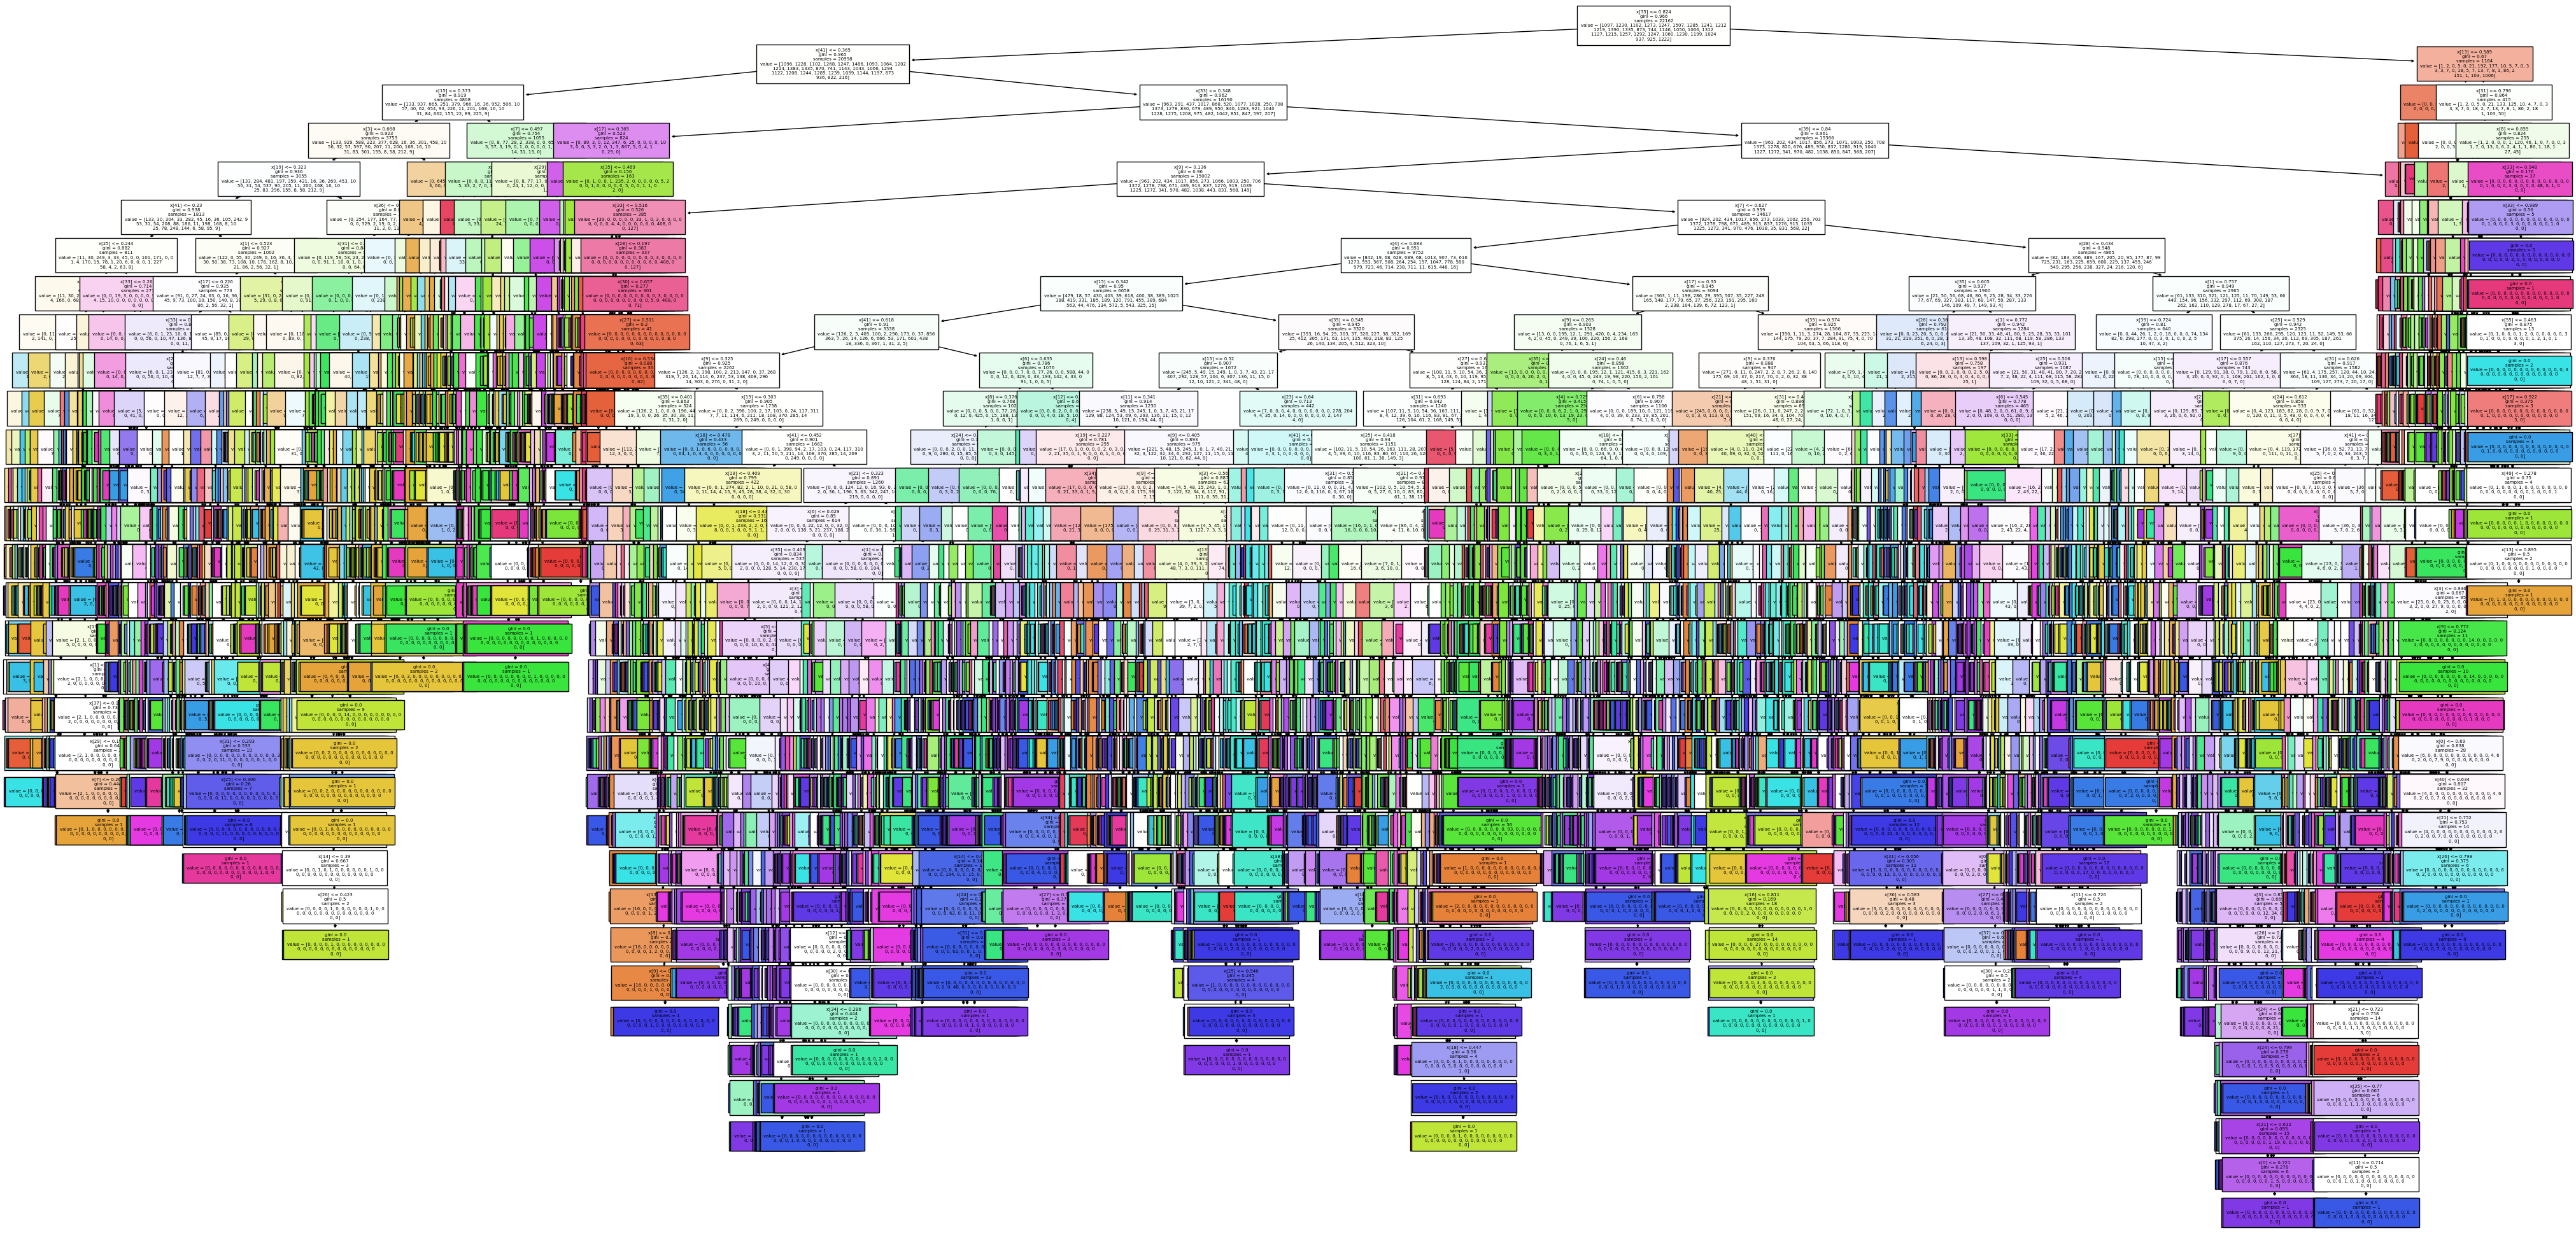

In [ ]:
#train classifier, we are going to use a random forest classifier on the landmarks

import pickle
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

data_path = '/content/drive/MyDrive/data.pickle'
data_dict = pickle.load(open(data_path, 'rb')) #read the stored data into a dic

#basically restoring the data and labels from their stored form in a dict
data = data_dict['data']
labels = data_dict['labels']

# pad sequences to ensure each sequence has the same length
max_seq_length = max(len(seq) for seq in data)
data = pad_sequences(data, maxlen=max_seq_length, padding='post', dtype='float32')
data = np.asarray(data)  # Convert padded sequences to numpy array
labels = np.asarray(labels)  # Convert labels to numpy array

#split data into training and test set (80% train 20% test)
data_train, data_test, label_train, label_test = train_test_split(data, labels, test_size = 0.2, shuffle = True, stratify = labels) #split data into training and test sets

#literally the model lmao
model = RandomForestClassifier()
model.fit(data_train, label_train)
predictions = model.predict(data_test)

#print total accuracy
accuracy = accuracy_score(predictions, label_test)
print('{}% of samples were classified correctly.'.format(accuracy*100))

#print accuracy for each class
class_accuracy = {}
for label in np.unique(labels):
    mask = label_test == label
    class_predictions = predictions[mask]
    class_label_test = label_test[mask]
    class_accuracy[label] = accuracy_score(class_predictions, class_label_test)

sorted_class_accuracy = sorted(class_accuracy.items(), key=lambda x: x[1])

#print from lowest accuracy first
for label, accuracy in sorted_class_accuracy:
    print('Accuracy for class {}: {:.2f}%'.format(label, accuracy * 100))

#plotting the decision tree
plt.figure(figsize=(50, 25))
plot_tree(model.estimators_[0], filled=True, fontsize=5)#plot first decision tree
plt.show()
